## Autores: Héctor Rojas - Pablo Veloz

__Estilo CSS__

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
td, th {
    text-align:left !important
    }
    
table, th, td {
  border: 1px solid black !important;
}    
</style>

""")

# Prueba 1: Análisis de Sentimientos de Twitter

- A continuación se presenta un problema clásico en el análisis de texto: Extraer el sentimiento asociado a un texto.
    - Para esto, utilizaremos una base de datos provenientes de CrowdFlower.
    - Para descargar los datos puede ejecutar el siguiente código:
    
        `- wget https://www.crowdflower.com/wp-content/uploads/2016/07/text_emotion.csv`

- El __objetivo general__ de esta prueba es alcanzar el mejor desempeño posible para clasificar si un tweet es positivo o negativo.
    - Para medir el desempeño, se evaluará con un conjunto de datos del cuál no tendrán acceso. De esta manera evitaremos que los modelos aprendan información sobre el conjunto de validación.
    - Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook, archivos auxiliares y csv).
    - Una vez terminada la prueba, comprime la carpeta y sube el .zip a la sección correspondiente.

## __Objetivos__
- Para alcanzar el objetivo general, su trabajo se puede desagregar en los siguientes puntos:
    1. Generar un análisis exploratorio sobre los datos contenidos en el DataFrame, considerando palabras más comunes y distribución de las clases en el vector objetivo.
    2. Preprocesamiento de Texto:
      - Para trabajar adecuadamente con texto, debemos preprocesar y posteriormente representar cada oración como un conjunto de características.
      - Para preprocesar los tweets, debemos transformarlos a lower case. Un problema recurrente en el análisis de texto es la alta ocurrencia de palabras comunes. Se recomienda eliminarlasmediante la declaración de stopwords. Para generar la exclusión de stopwords, podemos utilizar la librería nltk (Natural Language ToolKit) y descargar los stopwords con la siguiente instrucción.
        - import nltk
        - nltk.download('stopwords')
- Puede refinar los atributos a capturar mediante el proceso de lemantización (la reducción de variadas palabras con un tronco léxico común; ejemplo: Organización, Organiza, y Organizado presentan organi_ como tronco léxico en comúmn) o Stemming (la reducción de una palabra a una expresión generalizable). Cabe destacar que ésta última carece de análisis morfológico del lenguaje.
- Posterior a la refinación y preprocesamiento de las palabras, podemos representar cada oración en una matriz (o corpus) que permitirá reflejar la cantidad de ocurrencias de palabra en un registro. Para ello, pueden hacer uso de las librerías de preprocesamiento `sklearn.feature_extraction.text.CountVectorizer` o `sklearn.feature_extraction.text.TfidfVectorizer` de esta manera, tendremos un conjunto de características es mediante la frecuencia de ocurrencia de una palabra o término en el texto.
    3. Preparación del vector objetivo y las matrices de entrenamiento y validación:
    Nos interesa trabajar con dos tipos de emociones: positivas o negativas. Para ello deberá generar la recodificación de cada una de las clases en una de las dos emociones:
    
<table style="width:25%">
  <tr>
    <th>Original</th>
    <th>Recodificación</th>
  </tr>
  <tr>
    <td>'worry'</td>
    <td>Negativa</td>
 </tr>
 <tr>
    <td>'happiness'</td>
    <td>Positiva</td> 
 </tr>    
 <tr>
    <td>'sadness'</td>
    <td>Negativa</td>
 </tr>    
 <tr>
    <td>'love'</td>
    <td>Positiva</td>
 </tr>      
 <tr>
    <td>'surprise'</td>
     <td>Positiva</td>
 </tr>  
  <tr>
      <td>'fun'</td>
     <td>Positiva</td>
 </tr>  
 <tr>
      <td>'relief'</td>
     <td>Positiva</td>
 </tr>  
 <tr>
     <td>'hate'</td>
     <td>Negativa</td>
 </tr>    
  <tr>
     <td>'empty'</td>
     <td>Negativa</td>
 </tr>    
  <tr>
     <td>'enthusiasm'</td>
     <td>Positiva</td>
 </tr>      
  <tr>
     <td>'boredom'</td>
     <td>Negativa</td>
 </tr>      
  <tr> 
     <td>'anger'</td>
     <td>Negativa</td>
 </tr>         
</table> 
  
- Si el tweet está asignado `neutral`, clasifíquelo aleatoriamente entre positivo o negativo  
    4. Entrenamiento de modelos:
    
        - En base a los modelos vistos en clase, implemente por lo menos 5. Para cada uno de ellos justifique la elección de hiperparámetros. Si implementa búsqueda de grilla para cada uno de ellos, defina el rango de valores a tomar en cada hiperparámetro.
    
        - Reporte el desempeño de cada modelo en las muestras de entrenamiento y validación. Comente sobre la capacidad de generalización de cada uno de ellos haciendo uso de los conceptos vistos en el curso.
    
    5. Seleccione los 2 mejores modelos, serialicelos y envíelos a evaluación. Recuerde que el modelo serializado debe ser posterior al `fit` , para poder ejecutar predict en los nuevos datos.  
    6. La evaluación del modelo será realizada en función a un conjunto de datos reservados al cual no tienen acceso.

## I.- __Aspectos Preliminares__
### __Descripción del problema__  ¿Cómo clasificar si un tweet es positivo o negativo?<br>
El problema recae en el análisis de sentimientos de un tweet, por lo tanto, desde un texto se debe clasificar si el sentimiento es `negativo` o `positivo`. Particularmente, el problema propuesto recae en la categoría de __clasificación binaria__, por su naturaleza dicotómica.<br>

Para resolver este problema, además de emplear una técnica de aprendizaje automático propia, se conjuga con  procesamiento del lenguaje natural (PNL) cuyo campo en el aprendizaje automático es la capacidad de un computador para comprender, analizar, manipular y potencialmente generar lenguaje humano. Con ello, se analizará el texto importando la libreria NLTK especializada en PNL, es decir, en comprender el lenguaje humano por una máquina.<br>

Los procedimientos y aspectos que resaltan para este trabajo, son:
- __Proceso de Clasficación__
    
    
<img src="pasos.png">

De esta manera, podemos generar algunos objetivos para dar solución a la problemática, a saber: 
- __Objetivos Específicos__
    - Obtener los Datos: Importar data `training_tweets.csv`.
    - Exploración Inicial: Graficar Variable objetivo `sentiment`.
    - Estrategias de asignación de sentimientos: Recodificación de sentimientos en `positivos` y `negativos`. 
        - Diseño de estrategias para recodificar sentimientos definidos como `neutral`.
    - Limpieza de datos: Remover stop words y generar stemming.
    - Análisis Exploratorio: Graficar y ponderar el balance de clases `positivas` - `negativas`.
    - Análisis de Sentimiento: Palabras más comunes para sentimientos`positivos` - `negativos`.
    - Modelado de Tópicos: Modelos de clasificación y métricas atingente a clasificación. (se detalla más abajo)

    

## II.- Aspectos Computacionales
### Módulos Requeridos:
<table align="center">
    <caption> <H1><b>Módulos Gráficos</b></H1></caption>
	<tr>
		<th>Módulos</th>
		<th>Versión</th>
		<th>Descripción</th>
 	</tr>
 	<tr>
  		<td>Python</td>
   		<td> 3.7.3</td>
		<td style='text-align:left !important' >Lenguaje de Programación</td>
 	</tr>
	<tr>
  		<td>Jupyter Notebook</td>
   		<td>1.0.2</td>
		<td>Entorno de desarrollo interactivo basado en la web para portátiles, código y datos Jupyter. JupyterLab es flexible: configure y organice la interfaz de usuario para admitir una amplia gama de flujos de trabajo en ciencia de datos, informática científica y aprendizaje automático</td>
 	</tr>
	<tr>
  		<td>Pandas</td>
   		<td>0.24.2</td>
		<td>Es una biblioteca de código abierto con licencia BSD que proporciona estructuras de datos y herramientas de análisis de datos de alto rendimiento
        </td>
 	</tr>
	<tr>
  		<td>matplotlib.pyplot</td>
   		<td>3.1.0</td>
		<td>Es una biblioteca gráfica 2D de Python que produce cifras de calidad de publicación en una variedad de formatos impresos y entornos interactivos en todas las plataformas</td>
 	</tr>
    <tr>
  		<td>seaborn</td>
   		<td>0.9.0 </td>
		<td>Se ocupará para visualizar relaciones, si bien se basa en mathplotlib posee una alternativa más atractiva e informativa para las graficas.</td>
 	</tr>
</table>

<table align="center">
    <caption> <H1><b>Módulos Procesamiento de texto</b></H1></caption>
	<tr>
		<th>Módulos</th>
		<th>Versión</th>
		<th>Descripción</th>
 	</tr>
 	<tr>
  		<td>nltk.corpus import stopwords</td>
   		<td> 3.4.4</td>
		<td>Es un módulo que identifica palabras de conocidas como stopWords como "el", "es", "son", que no inciden en la identificación de un sentimiento. Estas palabras, se pueden filtrar del texto a procesar. No existe una lista universal de palabras de detención en la investigación de nlp, sin embargo, el módulo nltk contiene una lista de palabras de detención.</td>
 	</tr>
	<tr>
  		<td>nltk.stem import PorterStemmer</td>
   		<td>3.4.4</td>
		<td>Stemming es el proceso de producir variantes morfológicas de una palabra raíz / base. Los programas de derivación se denominan comúnmente algoritmos de derivación o stemmers. Un algoritmo de derivación reduce las palabras "recuperación", "recuperado", "recuperó" reduce a la raíz "recupera".</td>
 	</tr>
	<tr>
  		<td>sklearn.feature_extraction.text.TfidfVectorizer</td>
   		<td>0.21.2</td>
		<td>TF-IDF corresponde a una estadística que mide la importancia de un término en relación con un documento y un corpus
        </td>
 	</tr>
    <tr>
  		<td>re</td>
   		<td>3.7.3</td>
		<td> Este módulo proporciona operaciones de coincidencia de expresiones regulares.
        </td>
 	</tr>
    
</table>

<table align="center">
    <caption> <H1><b>Módulos Machine Learning</b></H1></caption>
	<tr>
		<th>Módulos</th>
		<th>Versión</th>
		<th>Descripción</th>
 	</tr>
 	<tr>
  		<td>sklearn</td>
   		<td> 0.21.2</td>
		<td> Es una biblioteca para aprendizaje de máquina de software libre para el lenguaje de programación Python.1​ Incluye varios algoritmos de clasificación, regresión y análisis de grupos</td>
 	</tr>
	<tr>
  		<td>selection.train_test_split</td>
   		<td>0.21.2</td>
		<td>Dividir matrices o arreglos aleatorios en subconjuntos de entrenamiento y prueba.</td>
 	</tr>
	<tr>
  		<td>preproccesing.StandardScaler</td>
   		<td>0.21.2</td>
		<td>Estandariza las características escalando los datos a la varianza de la unidad
        </td>
 	</tr>
    
       <tr>
  		<td>svm.SVC</td>
   		<td>0.21.2</td>
        <td> Es un algoritmo supervisado de aprendizaje automático que se puede usar para problemas de clasificación y regresión. En este algoritmo, graficamos cada elemento de datos como un punto en el espacio n-dimensional (donde n es el recuento del número de entidades) con el valor de cada entidad como el valor de una coordenada particular. Luego, realizamos la clasificación al encontrar el hiperplano que diferencia muy bien las dos clases.

En SVM, es beneficioso tener un hiperplano lineal entre dos clases. Para clases fácilmente separables, un hiperplano lineal óptimo hace la tarea. Sin embargo, si las clases no pueden estar separadas por un hiperplano lineal, digamos, una clase de punto de datos se extiende como un círculo y mantiene otra clase de punto de datos dentro de su círculo. Dado que tales clases no pueden estar separadas por un hiperplano lineal en el estado actual, para abordar este problema, SVM utiliza un método llamado truco del núcleo. El truco del kernel actúa como una función que toma espacio de entrada de baja dimensión y lo transforma en un espacio de dimensión superior. Es sobre todo útil en problemas de separación no lineal como el indicado anteriormente. En pocas palabras, realiza algunas transformaciones de datos complejas para descubrir la forma de separar los datos en función de las clases definidas     </td>
 	</tr> 
    <tr>
  		<td>naive_bayes.BernoulliNB</td>
   		<td>0.21.2</td>
        <td>Los ingenuos Bayes son una familia de clasificadores potentes y fáciles de entrenar, que determinan la probabilidad de un resultado, dado un conjunto de condiciones utilizando el teorema de Bayes. En otras palabras, las probabilidades condicionales se invierten para que la consulta se pueda expresar en función de cantidades medibles. El enfoque es simple y el adjetivo ingenuo se ha atribuido no porque estos algoritmos sean limitados o menos eficientes, sino por una suposición fundamental sobre los factores causales que discutiremos.

Los ingenuos Bayes son clasificadores multipropósito y es fácil encontrar su aplicación en muchos contextos diferentes. Sin embargo, el rendimiento es particularmente bueno en todas aquellas situaciones en las que la probabilidad de una clase está determinada por las probabilidades de algunos factores causales. Un buen ejemplo es el procesamiento del lenguaje natural, donde un texto puede considerarse como una instancia particular de un diccionario y las frecuencias relativas de todos los términos proporcionan suficiente información para inferir una clase perteneciente.       </td>
 	</tr> 
    <tr>
  		<td>ensemble.AdaBoostClassifier¶</td>
   		<td>0.21.2</td>
        <td>AdaBoost es un método de conjunto iterativo. El clasificador AdaBoost crea un clasificador fuerte combinando múltiples clasificadores de bajo rendimiento para que obtenga un clasificador fuerte de alta precisión. El concepto básico detrás de Adaboost es establecer los pesos de los clasificadores y entrenar la muestra de datos en cada iteración de modo que garantice las predicciones precisas de observaciones inusuales. Cualquier algoritmo de aprendizaje automático se puede utilizar como clasificador base si acepta pesos en el conjunto de entrenamiento. Adaboost debe cumplir dos condiciones:
- El clasificador debe ser entrenado de manera interactiva en varios ejemplos de entrenamiento pesado.
- En cada iteración, intenta proporcionar un ajuste excelente para estos ejemplos minimizando el error de entrenamiento.      </td>
 	</tr> 
    <tr>
  		<td>ensemble.RandomForestClassifier¶¶</td>
   		<td>0.21.2</td>
        <td>  Es uno de los algoritmos más factibles y fáciles de usar. Como sabemos, un bosque está compuesto de árboles, el mismo caso también está aquí. Los bosques aleatorios crean árboles de decisión en muestras de datos seleccionadas al azar, obtienen una predicción de cada árbol y seleccionan la mejor solución mediante la votación. Podemos usar bosque aleatorio para conocer la importancia de cada característica.
El bosque aleatorio es un algoritmo de aprendizaje automático que utiliza un método de conjunto. Se dice que el bosque aleatorio está formado por numerosos árboles de decisión y ayuda a abordar el problema del sobreajuste en los árboles de decisión. Estos árboles de decisión se construyen aleatoriamente seleccionando características aleatorias del conjunto de datos dado.</td>
 	</tr> 
    </table>
         
<table align="center">
    <caption> <H1><b>Métricas</b></H1></caption>
	<tr>
		<th>Módulos</th>
		<th>Versión</th>
		<th>Descripción</th>
 	</tr>
 	<tr>
  		<td>Accuracy</td>
   		<td>0.21.2</td>
		<td>Estimativo de casos predichos correctamente entre el total de casos.</td>
 	</tr>
	<tr>
  		<td>Precision</td>
   		<td>0.21.2</td>
		<td>Estimativo entre las predicciones correctas y casos positivos.</td>
 	</tr>
	<tr>
  		<td>Recall</td>
   		<td>0.21.2</td>
		<td>Estimativo entre los verdaderos positivos predichos por el modelo.
        </td>
 	</tr>
	<tr>
  		<td>F1</td>
   		<td>0.21.2</td>
		<td>Estimativo de la media entre Precision y Recall</td>
 	</tr>
    <tr>
  		<td>confusion_matrix</td>
   		<td>0.21.2 </td>
		<td>Una matriz de confusión es un resumen de los resultados de predicción sobre un problema de clasificación.
El número de predicciones correctas e incorrectas se resume con valores de conteo y se desglosa por clase.</td>
 	</tr>
    <tr>
  		<td>roc_curve</td>
   		<td>0.21.2</td>
		<td> evalúa la relación entre ambos errores (falsos positivos y falso negativo) condicional en todo el rango del clasificador</td>
 	</tr>
   

### III.- Análisis Exploratorio

In [3]:
import aux_funciones as auxiliares
import seaborn as sns
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import pickle
%matplotlib inline

__Carga de Datos__

In [4]:
df = pd.read_csv('training_tweets.csv').drop('Unnamed: 0', axis=1)

__Inspección de Datos__

In [5]:
df.head()

,content,sentiment
0,Happy Mama's day to all mothers,love
1,@LysdelTellez I am lost. Please help me find a...,worry
2,"@BoomKatt yes yes I AM, networking whore to th...",happiness
3,you@snapplynn Wish that would have been your t...,neutral
4,now i am doing the MicroEconomics project iha...,worry


__Inspección de vector Objetivo__: Sentimientos más comunes

((-0.5, 1599.5, 1199.5, -0.5),)

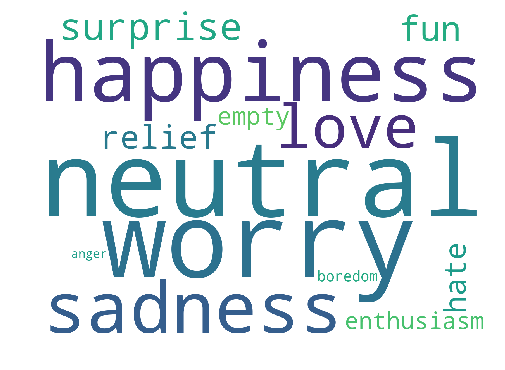

In [6]:
from wordcloud import WordCloud
cloud = WordCloud(width=1600, height=1200, collocations=False, background_color='white').generate(" ".join(df['sentiment'].astype(str)))
plt.figure(figsize=(8, 25))
plt.imshow(cloud)
plt.axis('off'),

In [7]:
df["sentiment"].value_counts()

neutral       6451
worry         6337
happiness     3952
sadness       3869
love          2908
surprise      1619
fun           1331
relief        1158
hate           975
empty          617
enthusiasm     559
boredom        135
anger           89
Name: sentiment, dtype: int64

__Graficar Sentimientos con mayor frecuencia__

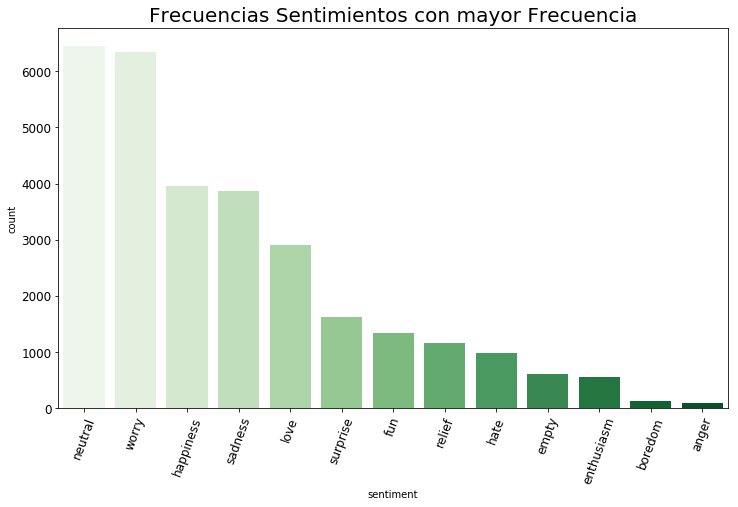

In [8]:
plt.figure(figsize=(12, 7))
font = {'family': 'Sans serif','color': 'black','weight':'normal','size': 20}
ax=sns.countplot(x = df['sentiment'], data = df, order = df['sentiment'].value_counts().index, palette='Greens')
plt.title('Frecuencias {}'.format("Sentimientos con mayor Frecuencia"),fontdict=font)
#plt.title()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.tick_params(axis='x', rotation=70)
plt.show()

__Binarizar Sentimientos__


In [9]:
def bin_sentiment(sentiment): 
    positivos=["happiness","love","surprise","fun","relief","enthusiasm"]
    negativos=["worry","sadness","hate","empty","boredom","anger"]
    if sentiment in positivos: 
        return "positiva"
    elif sentiment in negativos: 
        return "negativa"
    else:
        return "neutral"

In [10]:
df["bin_sentiment"] = df["sentiment"].apply(bin_sentiment) 

In [11]:
df.head()

,content,sentiment,bin_sentiment
0,Happy Mama's day to all mothers,love,positiva
1,@LysdelTellez I am lost. Please help me find a...,worry,negativa
2,"@BoomKatt yes yes I AM, networking whore to th...",happiness,positiva
3,you@snapplynn Wish that would have been your t...,neutral,neutral
4,now i am doing the MicroEconomics project iha...,worry,negativa


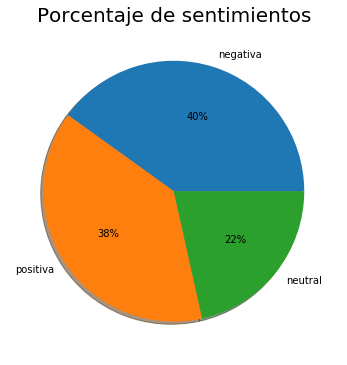

In [12]:
def circ_sentiments():
    font = {'family': 'Sans serif','color': 'black','weight': 'normal','size': 20}
    plot_size = plt.rcParams["figure.figsize"] 
    plot_size[0] = 8
    plot_size[1] = 6
    plt.rcParams["figure.figsize"] = plot_size 
    ax=df.bin_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',shadow=True)
    plt.title('Porcentaje de {}'.format("sentimientos"),fontdict=font)
    #ax.set_xlabel('')
    ax.set_ylabel('')
circ_sentiments()

### Asignando de manera aleatoria los sentimientos de tipo neutral

In [13]:
from random import choice
def bin_sentiment(sentiment): 
    positivos=["happiness","love","surprise","fun","relief","enthusiasm"]
    negativos=["worry","sadness","hate","empty","boredom","anger"]
    neutral=["neutral"]
    listado=["positiva","negativa"]
    if sentiment in positivos: 
        return "positiva"
    elif sentiment in negativos: 
        return "negativa"
    elif sentiment in neutral:
        return choice(listado)

In [14]:
df["bin_sentiment"] = df["sentiment"].apply(bin_sentiment) 
df.head()

,content,sentiment,bin_sentiment
0,Happy Mama's day to all mothers,love,positiva
1,@LysdelTellez I am lost. Please help me find a...,worry,negativa
2,"@BoomKatt yes yes I AM, networking whore to th...",happiness,positiva
3,you@snapplynn Wish that would have been your t...,neutral,positiva
4,now i am doing the MicroEconomics project iha...,worry,negativa


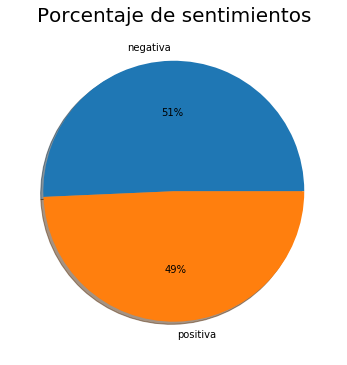

In [15]:
circ_sentiments()

### - __Limpieza de Texto__

- __Remover menciones__
   - Aplicando una función que reemplaza @ por ' '.<br>

In [16]:
df['new_content'] = df['content'].apply(lambda x: "".join(re.sub('@\S+', '', x)))

- __Remover urls__
   - Aplicando una función que reemplaza http o https por ' '.

In [17]:
df['new_content'] = df['new_content'].apply(lambda x: "".join(re.sub('http[s]?://\S+', '', x)))

In [18]:
df.head()

,content,sentiment,bin_sentiment,new_content
0,Happy Mama's day to all mothers,love,positiva,Happy Mama's day to all mothers
1,@LysdelTellez I am lost. Please help me find a...,worry,negativa,I am lost. Please help me find a good home.
2,"@BoomKatt yes yes I AM, networking whore to th...",happiness,positiva,"yes yes I AM, networking whore to the fullest..."
3,you@snapplynn Wish that would have been your t...,neutral,positiva,you Wish that would have been your tweet after...
4,now i am doing the MicroEconomics project iha...,worry,negativa,now i am doing the MicroEconomics project iha...


In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/hector/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

- __Stemmming__

In [20]:
stemmer = PorterStemmer()
words = stopwords.words("english")
df['content_cleaned'] = df['new_content'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [21]:
df.head()

,content,sentiment,bin_sentiment,new_content,content_cleaned
0,Happy Mama's day to all mothers,love,positiva,Happy Mama's day to all mothers,happi mama day mother
1,@LysdelTellez I am lost. Please help me find a...,worry,negativa,I am lost. Please help me find a good home.,i lost pleas help find good home
2,"@BoomKatt yes yes I AM, networking whore to th...",happiness,positiva,"yes yes I AM, networking whore to the fullest...",ye ye i am network whore fullest girl rih next
3,you@snapplynn Wish that would have been your t...,neutral,positiva,you Wish that would have been your tweet after...,wish would tweet follow
4,now i am doing the MicroEconomics project iha...,worry,negativa,now i am doing the MicroEconomics project iha...,microeconom project ihat subject amp besid eng...


In [22]:
def contar_palabras_por_sentimientos(sentimiento):
    from sklearn.feature_extraction.text import CountVectorizer
    # instanciamos un objeto
    count_vectorizer=CountVectorizer(max_df=.1,max_features=1000)
    # Implementamos los pasos fit y transform
    if sentimiento == "todo":
        count_vectorizer_fit = count_vectorizer.fit_transform(df['content_cleaned'])
    else:
        df_senti=df[df["bin_sentiment"]==sentimiento]
        df_content=df_senti["content_cleaned"]
        count_vectorizer_fit = count_vectorizer.fit_transform(df_content)
    # Extraemos tokens (palabras)
    words = count_vectorizer.get_feature_names()
        # extraemos frecuencia
    words_freq = count_vectorizer_fit.toarray().sum(axis=0)
    df2=pd.DataFrame(zip(words,words_freq),columns=["words","words_freq"])
    df2=df2.sort_values(by=["words_freq"],ascending=False)
    df3=df2.head(15)
        #plt.figure(figsize=(8, 6))
    plt.title('Palabras mas Frecuentes\n sentimiento: '+sentimiento)
    plt.tight_layout()
    return sns.barplot(y=df3['words'],x=df3['words_freq'], palette='Greens')

In [23]:
def graphs_counter_words(lista):
    import matplotlib 
    font = {'family': 'Sans serif','color': 'black','weight': 'normal','size': 35}
    plt.figure(figsize=(30,12))
    for n, i in enumerate(lista):
        plt.subplot(1, 3, n + 1)
        ax = contar_palabras_por_sentimientos(i)
        plt.title('Frecuencias {}'.format(i),fontdict=font)
        plt.tight_layout()
        plt.xticks(fontsize=25)
        plt.yticks(fontsize=30)
        ax.set_xlabel('')
        ax.set_ylabel('')

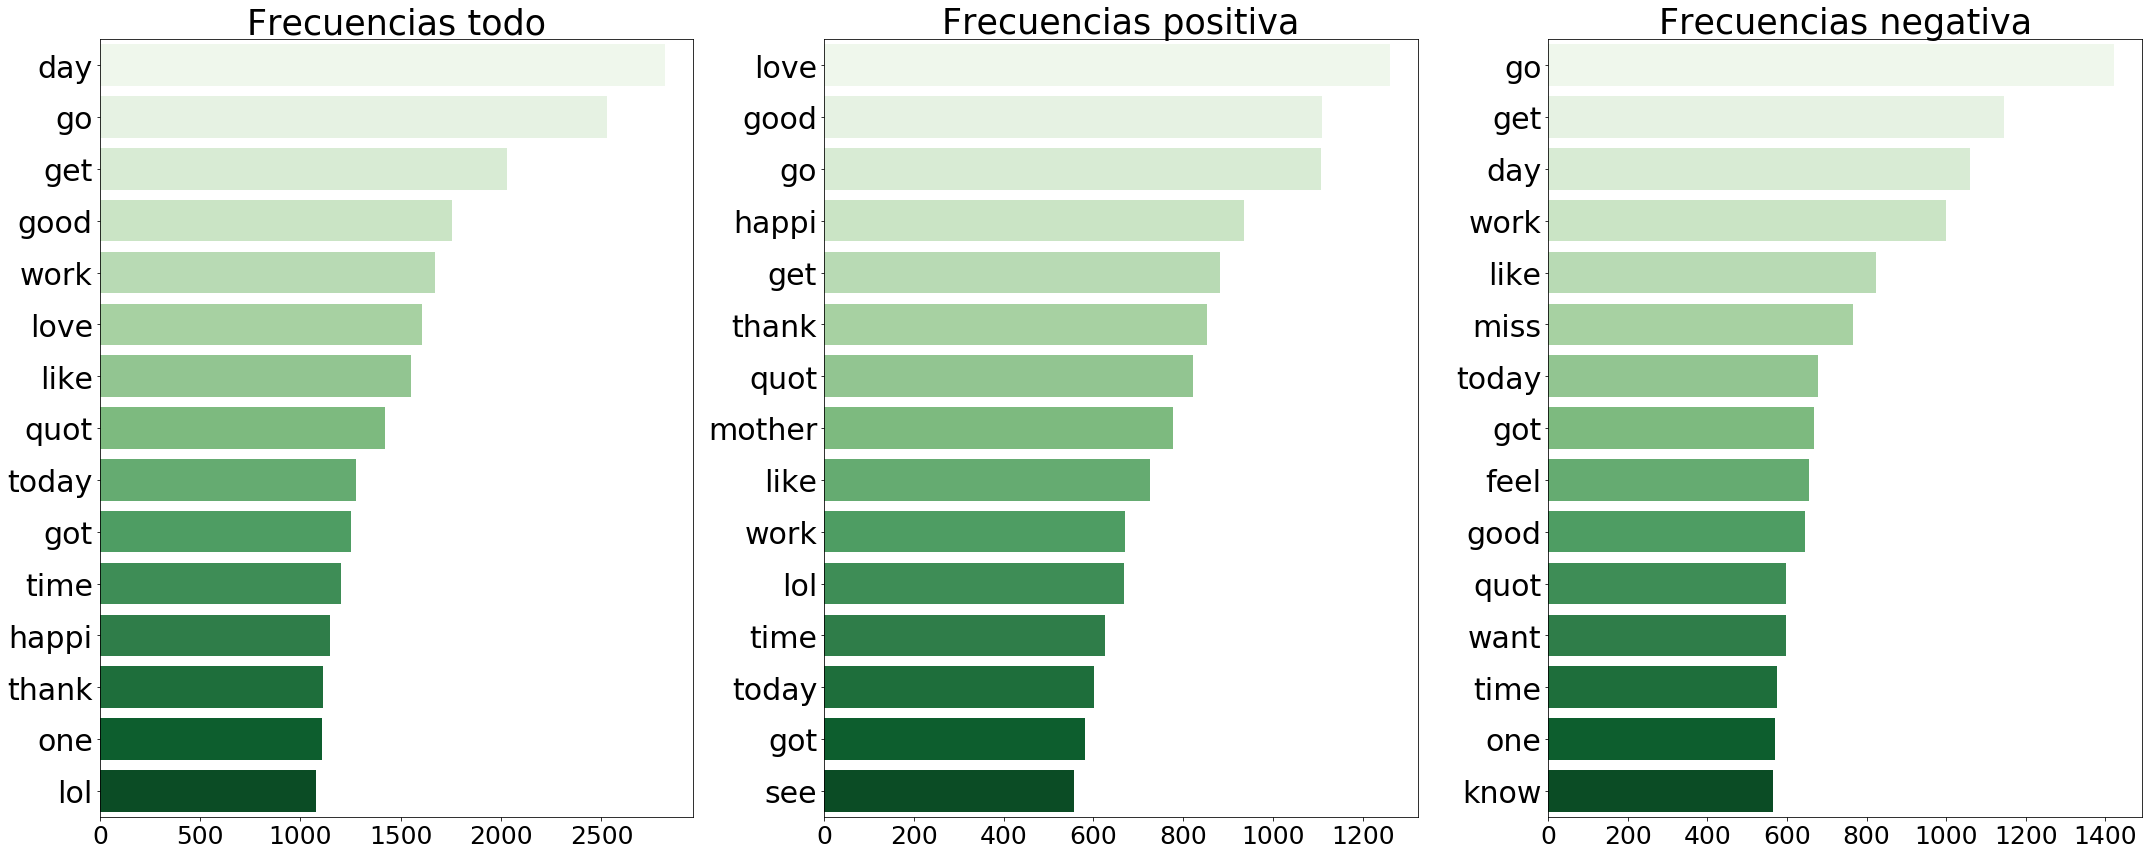

In [24]:
graphs_counter_words(["todo","positiva","negativa"])

In [25]:
df['token_cleaned']=df['content_cleaned'].apply(lambda x:x.split())

In [26]:
def lista_cadena(lista_tmp) :
    str_tmp = ''
    for i in range(len(lista_tmp)) :
        str_tmp += '{} '.format(lista_tmp[i])
    return str_tmp.strip()

In [27]:
df["token_cleaned2"] = df["token_cleaned"].apply(lista_cadena) 

In [28]:
df.head()

,content,sentiment,bin_sentiment,new_content,content_cleaned,token_cleaned,token_cleaned2
0,Happy Mama's day to all mothers,love,positiva,Happy Mama's day to all mothers,happi mama day mother,"[happi, mama, day, mother]",happi mama day mother
1,@LysdelTellez I am lost. Please help me find a...,worry,negativa,I am lost. Please help me find a good home.,i lost pleas help find good home,"[i, lost, pleas, help, find, good, home]",i lost pleas help find good home
2,"@BoomKatt yes yes I AM, networking whore to th...",happiness,positiva,"yes yes I AM, networking whore to the fullest...",ye ye i am network whore fullest girl rih next,"[ye, ye, i, am, network, whore, fullest, girl,...",ye ye i am network whore fullest girl rih next
3,you@snapplynn Wish that would have been your t...,neutral,positiva,you Wish that would have been your tweet after...,wish would tweet follow,"[wish, would, tweet, follow]",wish would tweet follow
4,now i am doing the MicroEconomics project iha...,worry,negativa,now i am doing the MicroEconomics project iha...,microeconom project ihat subject amp besid eng...,"[microeconom, project, ihat, subject, amp, bes...",microeconom project ihat subject amp besid eng...


In [29]:
df['token_cleaned3'] = df['token_cleaned2'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [30]:
df.head()

,content,sentiment,bin_sentiment,new_content,content_cleaned,token_cleaned,token_cleaned2,token_cleaned3
0,Happy Mama's day to all mothers,love,positiva,Happy Mama's day to all mothers,happi mama day mother,"[happi, mama, day, mother]",happi mama day mother,happi mama mother
1,@LysdelTellez I am lost. Please help me find a...,worry,negativa,I am lost. Please help me find a good home.,i lost pleas help find good home,"[i, lost, pleas, help, find, good, home]",i lost pleas help find good home,lost pleas help find good home
2,"@BoomKatt yes yes I AM, networking whore to th...",happiness,positiva,"yes yes I AM, networking whore to the fullest...",ye ye i am network whore fullest girl rih next,"[ye, ye, i, am, network, whore, fullest, girl,...",ye ye i am network whore fullest girl rih next,network whore fullest girl next
3,you@snapplynn Wish that would have been your t...,neutral,positiva,you Wish that would have been your tweet after...,wish would tweet follow,"[wish, would, tweet, follow]",wish would tweet follow,wish would tweet follow
4,now i am doing the MicroEconomics project iha...,worry,negativa,now i am doing the MicroEconomics project iha...,microeconom project ihat subject amp besid eng...,"[microeconom, project, ihat, subject, amp, bes...",microeconom project ihat subject amp besid eng...,microeconom project ihat subject besid english...


In [31]:
from sklearn.preprocessing import LabelEncoder
df['bin_sentiment2'] = LabelEncoder().fit_transform(df['bin_sentiment'])

In [32]:
df.head()

,content,sentiment,bin_sentiment,new_content,content_cleaned,token_cleaned,token_cleaned2,token_cleaned3,bin_sentiment2
0,Happy Mama's day to all mothers,love,positiva,Happy Mama's day to all mothers,happi mama day mother,"[happi, mama, day, mother]",happi mama day mother,happi mama mother,1
1,@LysdelTellez I am lost. Please help me find a...,worry,negativa,I am lost. Please help me find a good home.,i lost pleas help find good home,"[i, lost, pleas, help, find, good, home]",i lost pleas help find good home,lost pleas help find good home,0
2,"@BoomKatt yes yes I AM, networking whore to th...",happiness,positiva,"yes yes I AM, networking whore to the fullest...",ye ye i am network whore fullest girl rih next,"[ye, ye, i, am, network, whore, fullest, girl,...",ye ye i am network whore fullest girl rih next,network whore fullest girl next,1
3,you@snapplynn Wish that would have been your t...,neutral,positiva,you Wish that would have been your tweet after...,wish would tweet follow,"[wish, would, tweet, follow]",wish would tweet follow,wish would tweet follow,1
4,now i am doing the MicroEconomics project iha...,worry,negativa,now i am doing the MicroEconomics project iha...,microeconom project ihat subject amp besid eng...,"[microeconom, project, ihat, subject, amp, bes...",microeconom project ihat subject amp besid eng...,microeconom project ihat subject besid english...,0


#### División de muestras e instancias de entrenamiento y validación

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(df['token_cleaned3']).toarray()

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [35]:
df2 = df.copy()
y_vec = df2['bin_sentiment2']
X_train, X_test, y_train, y_test = train_test_split(X,y_vec,test_size=0.33,random_state=1)

## Entrenamiento y comparación de modelos

In [36]:
from sklearn.metrics import classification_report, accuracy_score

In [63]:
rep_seed = 17536

### 1. RandomForestClassifier

In [64]:
rf_classifier1 = RandomForestClassifier(n_estimators=100, random_state=rep_seed, n_jobs=-1)
rf_classifier1.fit(X_train, y_train)
y_hat_rf_1 = rf_classifier1.predict(X_test)

In [65]:
print(classification_report(y_test, y_hat_rf_1))

              precision    recall  f1-score   support

           0       0.65      0.68      0.66      5047
           1       0.65      0.61      0.63      4853

   micro avg       0.65      0.65      0.65      9900
   macro avg       0.65      0.65      0.65      9900
weighted avg       0.65      0.65      0.65      9900



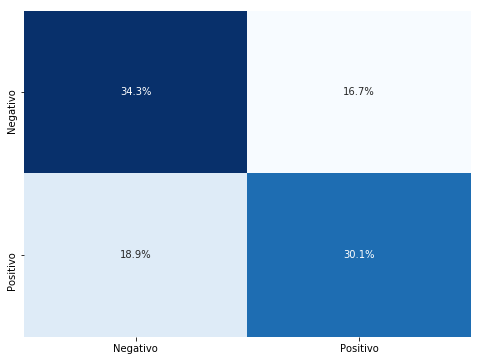

In [39]:
auxiliares.matriz_confusion(y_test, y_hat_rf_1, ['Negativo', 'Positivo'])

### 2. Multinomial BN

In [40]:
from sklearn.naive_bayes import MultinomialNB
mnb_classifier2 = MultinomialNB().fit(X_train, y_train)
y_hat_mnb_2 = mnb_classifier2.predict(X_test)

In [41]:
print(classification_report(y_test, y_hat_mnb_2))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68      5047
           1       0.66      0.60      0.63      4853

   micro avg       0.66      0.66      0.66      9900
   macro avg       0.66      0.65      0.65      9900
weighted avg       0.66      0.66      0.65      9900



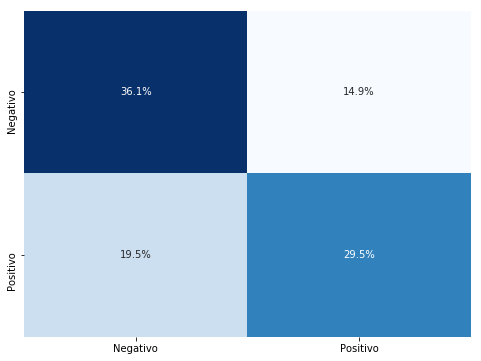

In [42]:
auxiliares.matriz_confusion(y_test, y_hat_mnb_2, ['Negativo', 'Positivo'])

### 3. SVC (Máquinas de soporte vectorial)

In [ ]:
#from sklearn.svm import SVC
#svc_classifier3 = SVC(kernel='linear', probability=True).fit(X_train, y_train)
#y_hat_svc_3 = svc_classifier3.predict(X_test)
#y_hat_svc_3_pr = svc_classifier3.predict_proba(X_test)

In [ ]:
#print(classification_report(y_test, y_hat_svc_3))

### 3. Linear Discriminant Analysis

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_classifier3 = LinearDiscriminantAnalysis().fit(X_train, y_train)
y_hat_lda_3 = lda_classifier3.predict(X_test)

In [46]:
print(classification_report(y_test, y_hat_lda_3))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67      5047
           1       0.66      0.62      0.64      4853

   micro avg       0.65      0.65      0.65      9900
   macro avg       0.65      0.65      0.65      9900
weighted avg       0.65      0.65      0.65      9900



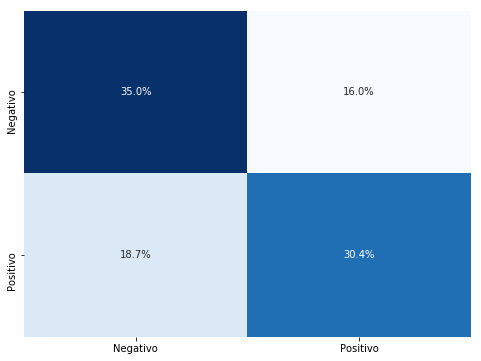

In [49]:
auxiliares.matriz_confusion(y_test, y_hat_lda_3, ['Negativo', 'Positivo'])

### 4. Ada Boost (con DecisionTreeClassifier)

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
param_grid_ada = {'learning_rate': [0.01, 0.1, 0.5], 'n_estimators': [50, 100, 500, 1000, 2000]}
decision_stump = DecisionTreeClassifier(max_depth=1, random_state=17536).fit(X_train, y_train)
adb_classifier4 = AdaBoostClassifier(base_estimator=decision_stump, random_state=17536).fit(X_train, y_train)
y_hat_adb_4 = adb_classifier4.predict(X_test)

In [51]:
print(classification_report(y_test, y_hat_adb_4))

              precision    recall  f1-score   support

           0       0.59      0.88      0.71      5047
           1       0.74      0.37      0.50      4853

   micro avg       0.63      0.63      0.63      9900
   macro avg       0.67      0.62      0.60      9900
weighted avg       0.67      0.63      0.60      9900



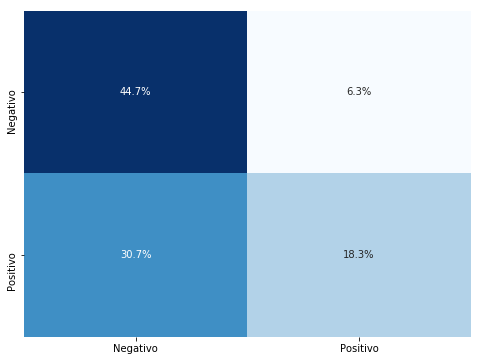

In [52]:
auxiliares.matriz_confusion(y_test, y_hat_adb_4, ['Negativo', 'Positivo'])

### 5. Gradient Boost 

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gdb_classifier5 = GradientBoostingClassifier(random_state=17536).fit(X_train, y_train)
y_hat_gdb_5 = gdb_classifier5.predict(X_test)

In [54]:
print(classification_report(y_test, y_hat_gdb_5))

              precision    recall  f1-score   support

           0       0.60      0.87      0.71      5047
           1       0.74      0.39      0.51      4853

   micro avg       0.63      0.63      0.63      9900
   macro avg       0.67      0.63      0.61      9900
weighted avg       0.67      0.63      0.61      9900



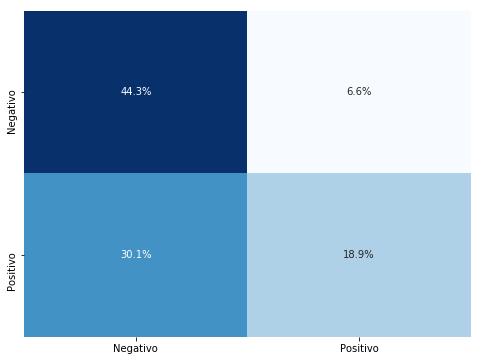

In [55]:
auxiliares.matriz_confusion(y_test, y_hat_gdb_5, ['Negativo', 'Positivo'])

LDA


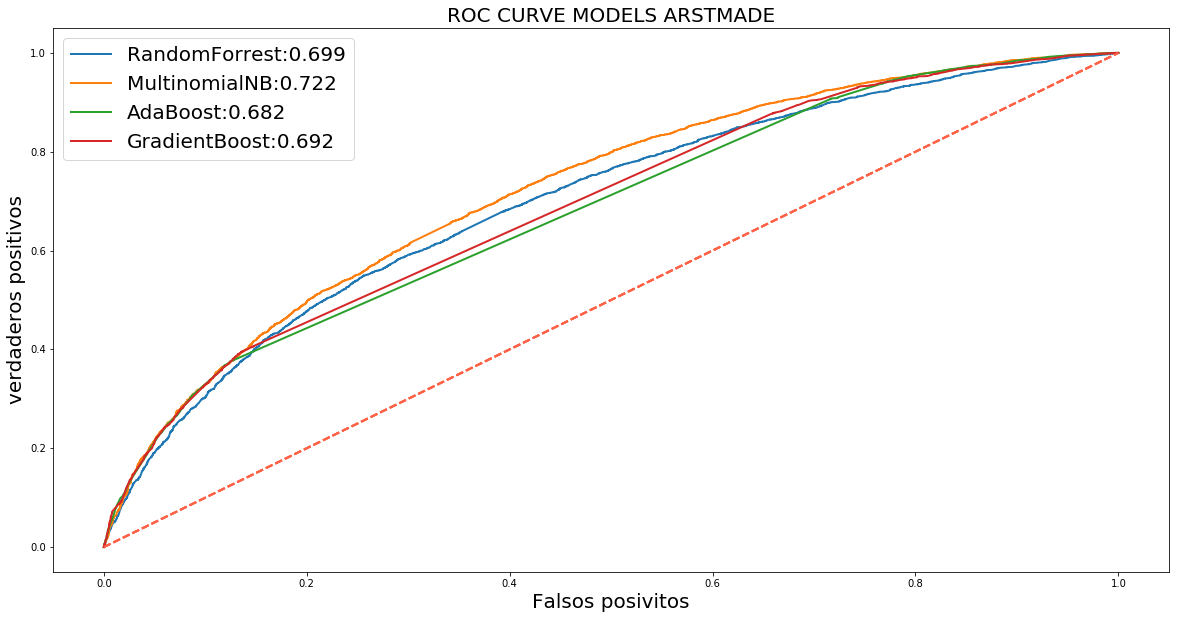

In [57]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
plt.figure(figsize=(20, 10))
models = [('RandomForrest', rf_classifier1),
          ('MultinomialNB', mnb_classifier2),
          ('LDA', y_hat_lda_3),
          ('AdaBoost', adb_classifier4),
          ('GradientBoost', gdb_classifier5)]

for i,(name,model) in enumerate(models):
    try :
        yhat_pr = model.predict_proba(X_test)[:,1]
        auc_score = roc_auc_score(y_test, yhat_pr)
        auc_score = round(auc_score, 3)
        false_positive,true_positive,threshold = roc_curve(y_test, yhat_pr)
        plt.plot(false_positive, true_positive,lw=2, label=name+str(':'+ str(auc_score)))
        plt.plot([0,1],linestyle="--",lw=2,color="tomato")
    except :
        print(name)
plt.ylabel("verdaderos positivos", fontsize=20)
plt.xlabel("Falsos posivitos", fontsize=20)
plt.title("ROC CURVE MODELS ARSTMADE",fontsize=20)
plt.legend(fontsize=20)

#### Dado su desempeño el modelo Multinomial Naive Bayes es seleccionado para realizar una refactorización con el fin de obtener mejores métricas. Es importante es destacar que el modelo con el peor desempeño AdaBoost obtuvo un ROC score .182 superior a un modelo aleatorio.

In [68]:
estimators = [
                ('Random Forest', RandomForestClassifier(random_state=rep_seed)),
                ('MultinomialNB', MultinomialNB())
            ]

In [71]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators).fit(X_train, y_train)
y_hat_vc_6 = voting_classifier.predict(X_test)

In [72]:
print(classification_report(y_test, y_hat_vc_6))

              precision    recall  f1-score   support

           0       0.61      0.82      0.70      5047
           1       0.71      0.47      0.56      4853

   micro avg       0.65      0.65      0.65      9900
   macro avg       0.66      0.64      0.63      9900
weighted avg       0.66      0.65      0.63      9900



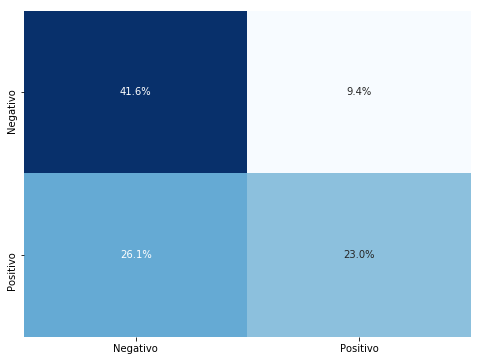

In [73]:
auxiliares.matriz_confusion(y_test, y_hat_vc_6, ['Negativo', 'Positivo'])

## Conclusion

### A partir de los modelos obtenidos para clasificar la predicción de twetts, ya sean positivos y negativos, se encontraron métricas muy similares. Para clase 0("negativos") la menor precision encontrada fue de 0.59 y el más alto fue de 0.65, en cambio para la clase 1("positivos") fue de 0.65 y 0.74 respectivamente. Posterior se realizó un  ensamble con los modelos que previamente obtuvieron la mejor métrica roc_score para "RF" y "NB", aún así las métricas de validación se mantuvieron muy similares a las de los modelos realizados anteriormente. 